In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("../data/logfile-storage-v4.csv", delimiter=";")
dataset.head()

,datacenter_id,datacenter_name,datacenter_storage_energy,storage_id,system,storage_capacity,capacity_used,active_duration,idle_intervals,duration,total_energy_active,total_energy_idle,average_rotation_latency,average_seek_Time,max_internal_data_transfer_rate,is_active,idle_power,active_power,files,Unnamed: 19
0,3,Datacenter_1,113716.350085,0,storage,900000.0,144384.0,745.127461,1.0000017892249078:,961.692048,4321.739273,3.000005,0.003,0.004,198.0,False,3.0,5.8,"55596,3072,15.519012736963932:1-55848,3072,15....",NaN
1,3,Datacenter_1,113716.350085,1,storage,900000.0,139776.0,721.881444,1.0000001822594735:,961.692048,4186.912375,3.000001,0.003,0.004,198.0,False,3.0,5.8,"3-55896,3072,15.518360641031068:2-572526,2560,...",NaN
2,3,Datacenter_1,113716.350085,2,storage,900000.0,145408.0,765.796667,1.000000266829021:,961.692048,4441.620671,3.000001,0.003,0.004,198.0,False,3.0,5.8,"1-450552,1024,5.183152612866157:6-753921,3072,...",NaN
3,3,Datacenter_1,113716.350085,3,storage,900000.0,169472.0,954.602773,1.0000002917759447:,961.692048,5536.696084,3.000001,0.003,0.004,198.0,False,3.0,5.8,"591399,3072,15.520055166649824:288827,512,2.59...",NaN
4,3,Datacenter_1,113716.350085,4,storage,900000.0,168448.0,856.300420,1.0000004167879113:,961.692048,4966.542439,3.000001,0.003,0.004,198.0,False,3.0,5.8,"25-240840,3072,15.526928354068726:1-878247,102...",NaN


## Energy Consumption

#### Maximum energy consumption of persistent storage

The datacenter 'Datacenter_1' current persistent storage infrastructure at max can consume 0.14185 Joules (J) per second.


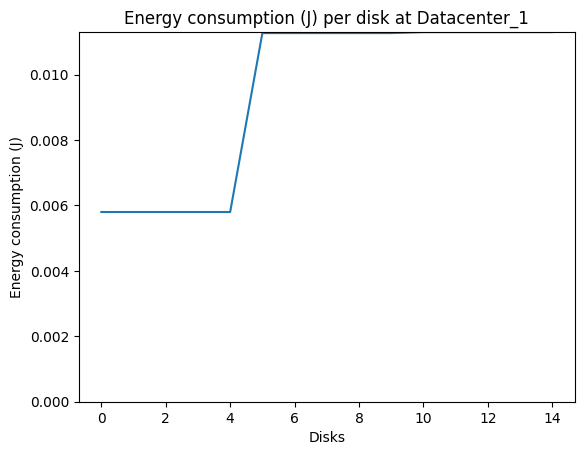

Datacenter_1's current persistent storage infrastructure can at max consume 131190.19874689102 Kilo Joules (KJ) over the duration 961.6920478889256.


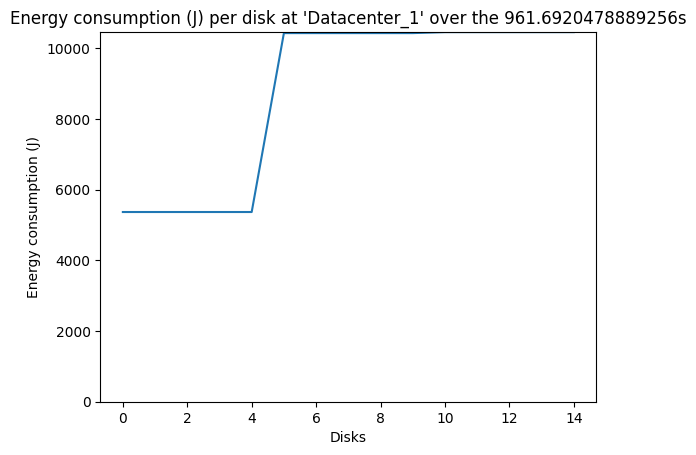

The datacenter 'Datacenter_2' current persistent storage infrastructure at max can consume 0.14185 Joules (J) per second.


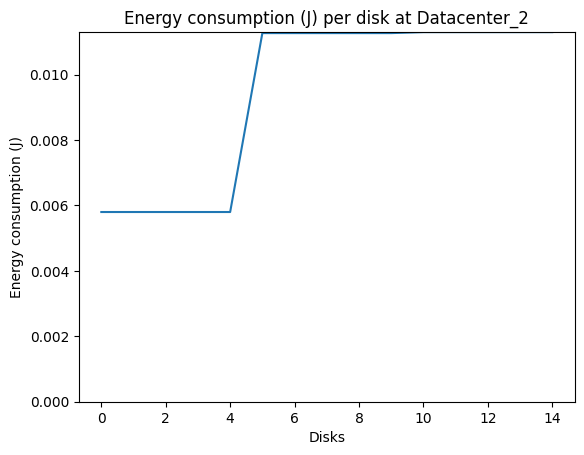

Datacenter_2's current persistent storage infrastructure can at max consume 262380.39749378205 Kilo Joules (KJ) over the duration 961.6920478889256.


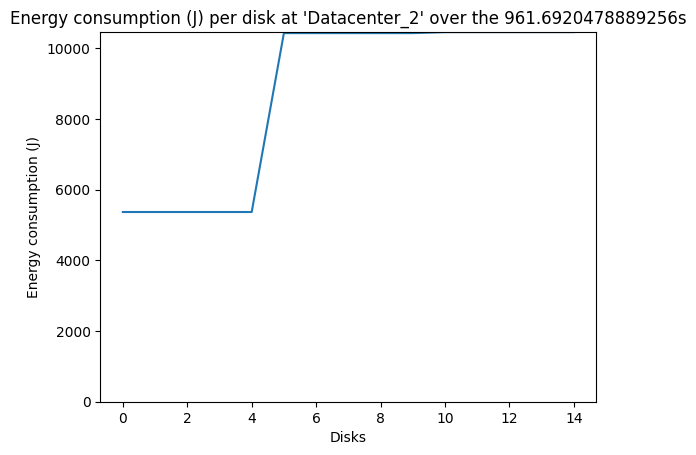

The datacenter 'Datacenter_3' current persistent storage infrastructure at max can consume 0.14185 Joules (J) per second.


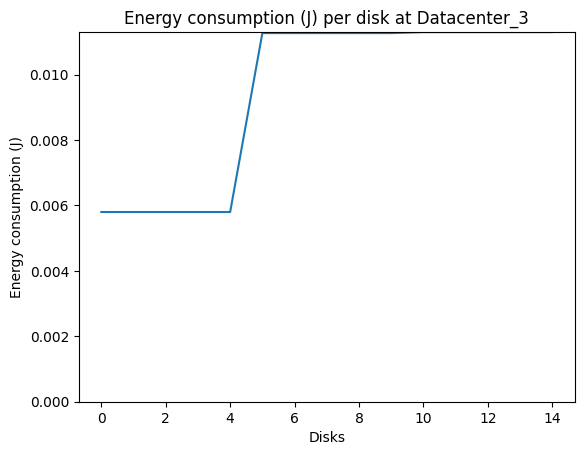

Datacenter_3's current persistent storage infrastructure can at max consume 393570.5962406731 Kilo Joules (KJ) over the duration 961.6920478889256.


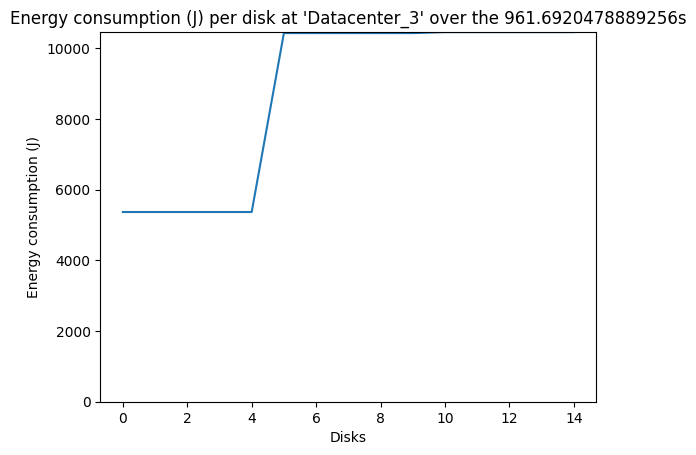

The datacenter 'Datacenter_4' current persistent storage infrastructure at max can consume 0.14185 Joules (J) per second.


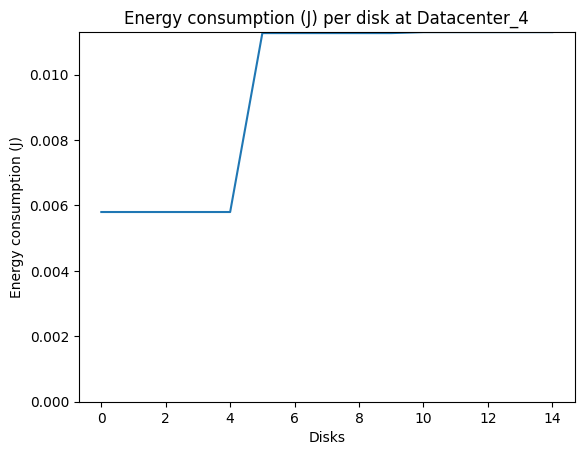

Datacenter_4's current persistent storage infrastructure can at max consume 524760.7949875641 Kilo Joules (KJ) over the duration 961.6920478889256.


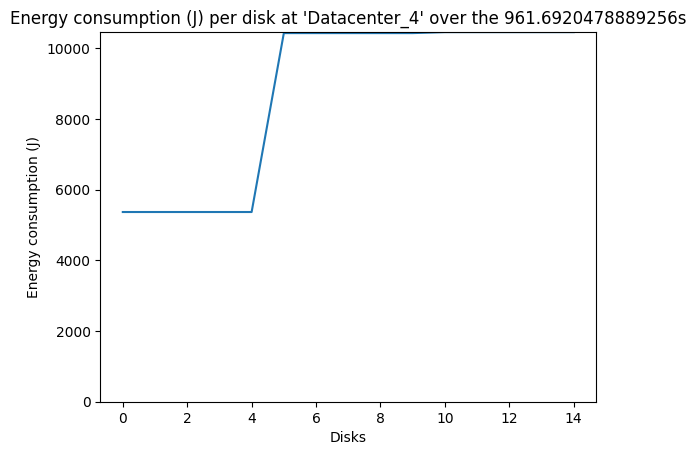

The cloud providers current computing infrastructure at max can consume 0.5673999999999998 Joules (J) per second and over a duration of 961.6920478889256 consume 524760.794987564


In [22]:
labels = np.unique(dataset['datacenter_name'])
duration = dataset['duration'][0]

# max_power = 0
max_power_per_disk = np.array([])

# max_power_consumed = 0
max_power_consumed_per_disk = np.array([])

max_power_per_datacenter = np.array([])
max_power_consumed_per_datacenter = np.array([])

duration_per_disk = np.array([])

for i in range(len(labels)):
    # max_power_per_datacenter = 0
    max_power_per_disk_per_datacenter = np.array([])
    
    # max_power_consumed_per_datacenter = 0
    max_power_consumed_per_disk_per_datacenter = np.array([])
    
    duration_per_disk_per_datacenter = np.array([])
    for _, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        
        # idle_duration = 0
        # for idle_interval in sample['idle_intervals'].split(":"):
        #     if idle_interval != '':
        #         idle_duration += float(idle_interval)
                
        active_power = float(sample['active_power'])
        consumed_active_power = float(sample['active_duration']) * float(sample['active_power'])
        max_consumed_active_power = float(sample['active_power']) * float(sample['duration'])
        consumed_idle_power = (float(sample['duration']) - float(sample['active_duration'])) * float(sample['idle_power'])
        # max_power_per_datacenter += active_power
        max_power_per_disk = np.append(max_power_per_disk, active_power)
        max_power_per_disk_per_datacenter = np.append(max_power_per_disk_per_datacenter, active_power)
        max_power_consumed_per_disk = np.append(max_power_consumed_per_disk, float(sample['active_power'])*duration)
        max_power_consumed_per_disk_per_datacenter = np.append(max_power_consumed_per_disk_per_datacenter, float(sample['active_power'])*duration)
        duration_per_disk_per_datacenter = np.append(duration_per_disk_per_datacenter, sample['duration'])
    max_power_per_datacenter = np.append(max_power_per_datacenter, np.sum(max_power_per_disk_per_datacenter))
    max_power_consumed_per_datacenter = np.append(max_power_consumed_per_datacenter, np.sum(max_power_per_disk_per_datacenter) * duration)
    # max_power += np.sum(max_power_per_disk_per_datacenter)
    
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure at max can consume {(np.sum(max_power_per_disk_per_datacenter) * 1)/1000} Joules (J) per second.")
    plt.plot(np.arange(0, len(max_power_per_disk_per_datacenter)), ((max_power_per_disk_per_datacenter*1)/1000))
    plt.ylim((0, ((max(max_power_per_disk_per_datacenter)*1)/1000)))
    plt.xlabel("Disks")
    plt.ylabel("Energy consumption (J)")
    plt.title(f"Energy consumption (J) per disk at {labels[i]}")
    plt.show()
    
    print(f"{labels[i]}'s current persistent storage infrastructure can at max consume {(np.sum(max_power_consumed_per_datacenter) * duration)/1000} Kilo Joules (KJ) over the duration {duration}.")
    plt.plot(np.arange(0, len(max_power_consumed_per_disk_per_datacenter)), ((max_power_consumed_per_disk_per_datacenter * duration)/1000))
    plt.ylim((0, ((max(max_power_consumed_per_disk_per_datacenter) * duration)/1000)))
    plt.xlabel("Disks")
    plt.ylabel("Energy consumption (J)")
    plt.title(f"Energy consumption (J) per disk at '{labels[i]}' over the {duration}s")
    plt.show()

print(f"The cloud providers current computing infrastructure at max can consume {(np.sum(max_power_per_disk) * 1)/1000} Joules (J) per second and over a duration of {duration} consume {(np.sum(max_power_consumed_per_disk) * duration)/1000}")

#### Current energy consumption of persistent storage

The datacenter 'Datacenter_1' current persistent storage infrastructure is consumes [0.14185] Kilo Joules (kJ) per second.
The datacenter 'Datacenter_1' current persistent storage infrastructure is consuming [ 4.97143303  4.90634419  5.02930681  5.55796391  5.28271732  9.28011702
 10.01576848 10.83389938 10.55440462 10.69959012  9.40330723 10.13199861
 10.25327063  9.26964158 10.2658247 ] Kilo Joules (kJ) over the duration 961.6920478889256s.


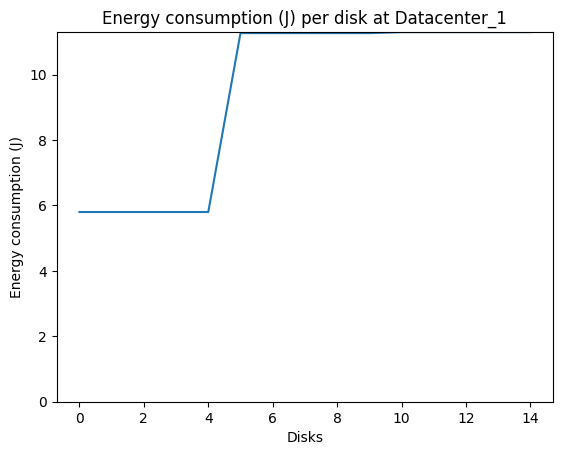

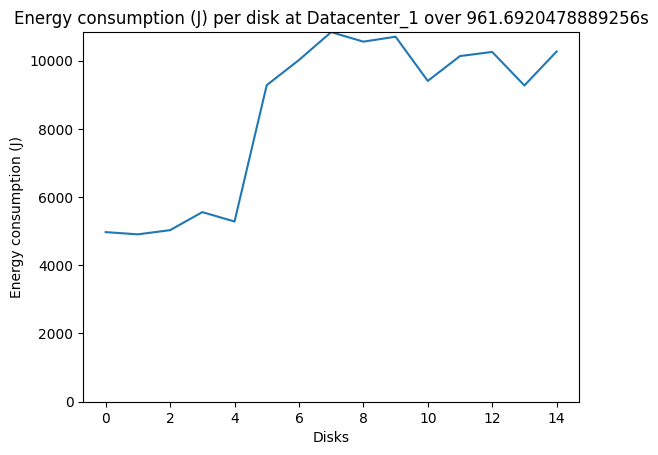

The datacenter 'Datacenter_2' current persistent storage infrastructure is consumes [0.14185 0.0805 ] Kilo Joules (kJ) per second.
The datacenter 'Datacenter_2' current persistent storage infrastructure is consuming [2.88507614 2.88507614 2.88507614 2.88507614 2.88507614 6.63567513
 6.63567513 6.63567513 6.63567513 6.63567513 5.9624907  5.9624907
 5.9624907  5.9624907  5.9624907 ] Kilo Joules (kJ) over the duration 961.6920478889256s.


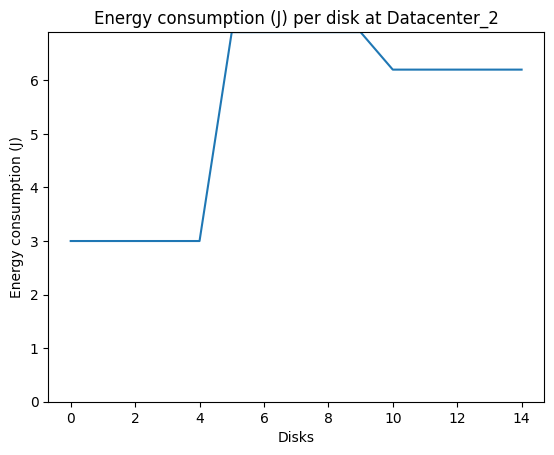

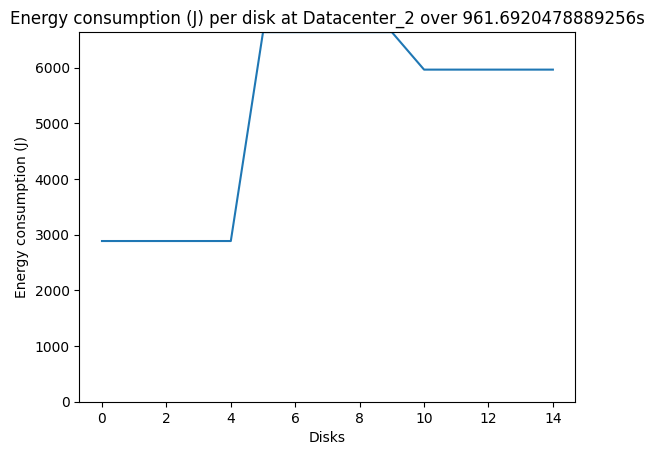

The datacenter 'Datacenter_3' current persistent storage infrastructure is consumes [0.14185 0.0805  0.0805 ] Kilo Joules (kJ) per second.
The datacenter 'Datacenter_3' current persistent storage infrastructure is consuming [2.88507614 2.88507614 2.88507614 2.88507614 2.88507614 6.63567513
 6.63567513 6.63567513 6.63567513 6.63567513 5.9624907  5.9624907
 5.9624907  5.9624907  5.9624907 ] Kilo Joules (kJ) over the duration 961.6920478889256s.


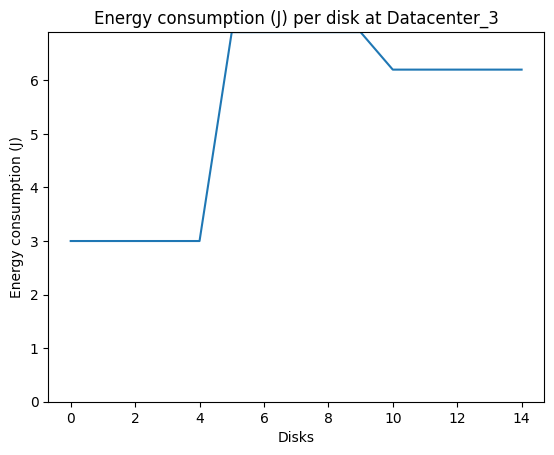

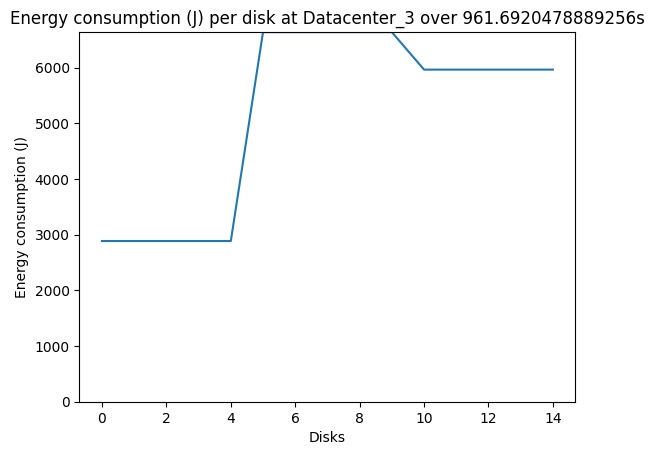

The datacenter 'Datacenter_4' current persistent storage infrastructure is consumes [0.14185 0.0805  0.0805  0.0805 ] Kilo Joules (kJ) per second.
The datacenter 'Datacenter_4' current persistent storage infrastructure is consuming [2.88507614 2.88507614 2.88507614 2.88507614 2.88507614 6.63567513
 6.63567513 6.63567513 6.63567513 6.63567513 5.9624907  5.9624907
 5.9624907  5.9624907  5.9624907 ] Kilo Joules (kJ) over the duration 961.6920478889256s.


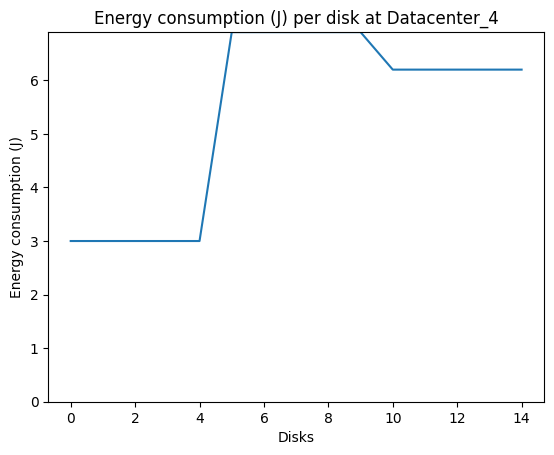

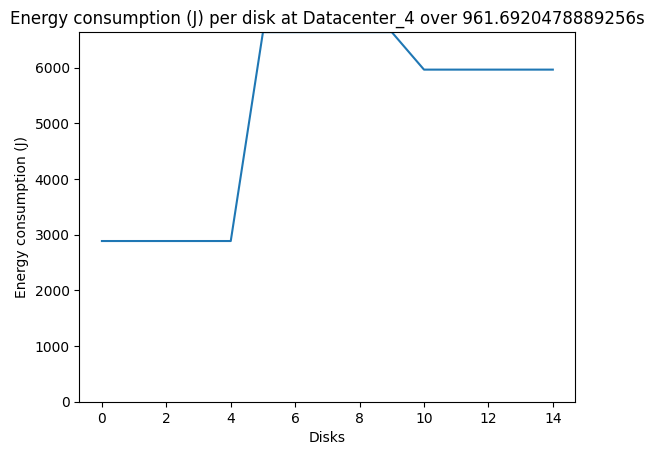

The cloud providers current storage area network consumes 0.38335 Kilo Joules (kJ) per second.
The cloud providers current storage area network is consuming 358.70421718841885 Kilo Joules (kJ) over the duration 961.6920478889256s.


In [23]:
labels = np.unique(dataset['datacenter_name'])
duration = dataset['duration'][0]

current_power = 0
current_power_per_disk = np.array([])

current_power_consumed = 0
current_power_consumed_per_disk = np.array([])

current_power_per_datacenter = np.array([])
current_power_consumed_per_datacenter = np.array([])


for i in range(len(labels)):
    # current_power_per_datacenter = 0
    current_power_per_disk_per_datacenter = np.array([])
    
    # current_power_consumed_per_datacenter = 0
    current_power_consumed_per_disk_per_datacenter = np.array([])
    
    duration_per_disk_per_datacenter = np.array([])
    for _, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        
        # idle_duration = 0
        # for idle_interval in sample['idle_intervals'].split(":"):
        #     if idle_interval != '':
        #         idle_duration += float(idle_interval)
        
        # If disk is mostly in active power mode the current power is set to the active power and vice versa for the idle power mode.
        if float(sample['active_duration']) > (float(sample['duration']) - float(sample['active_duration'])):
            # current_power_per_datacenter += float(sample['active_power'])
            current_power_per_disk = np.append(current_power_per_disk, float(sample['active_power']))
            current_power_per_disk_per_datacenter = np.append(current_power_per_disk_per_datacenter, float(sample['active_power']))
        else:
            # current_power_per_datacenter += float(sample['idle_power'])
            current_power_per_disk = np.append(current_power_per_disk, float(sample['idle_power']))
            current_power_per_disk_per_datacenter = np.append(current_power_per_disk_per_datacenter, float(sample['idle_power']))
        
        consumed_active_power = float(sample['active_duration']) * float(sample['active_power'])
        consumed_idle_power = (float(sample['duration']) - float(sample['active_duration'])) * float(sample['idle_power'])
        
        # current_power_consumed_per_datacenter += consumed_active_power + consumed_idle_power
        current_power_consumed_per_disk = np.append(current_power_consumed_per_disk, consumed_active_power + consumed_idle_power)
        current_power_consumed_per_disk_per_datacenter = np.append(current_power_consumed_per_disk_per_datacenter, consumed_active_power + consumed_idle_power)
        duration_per_disk = np.append(duration_per_disk, float(sample['duration']))
    current_power_per_datacenter = np.append(current_power_per_datacenter, np.sum(current_power_per_disk_per_datacenter)) 
    current_power_consumed_per_datacenter = np.append(current_power_consumed_per_datacenter, np.sum(current_power_consumed_per_disk_per_datacenter)) 
    
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure is consumes {(current_power_per_datacenter * 1)/1000} Kilo Joules (kJ) per second.") # Get actual duration, get average power? or the power consumed power over the duration?
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure is consuming {(current_power_consumed_per_disk_per_datacenter * 1)/1000} Kilo Joules (kJ) over the duration {duration}s.") # Get actual duration, get average power? or the power consumed power over the duration?
    # current_power += current_power_per_datacenter
    # current_power_consumed += current_power_consumed_per_datacenter
    
    plt.plot(np.arange(0, len(current_power_per_disk_per_datacenter)), (current_power_per_disk_per_datacenter*1))
    plt.ylim((0, max(current_power_per_disk_per_datacenter)))
    plt.xlabel("Disks")
    plt.ylabel("Energy consumption (J)")
    plt.title(f"Energy consumption (J) per disk at {labels[i]}")
    plt.show()
    
    plt.plot(np.arange(0, len(current_power_consumed_per_disk_per_datacenter)), (current_power_consumed_per_disk_per_datacenter*1))
    plt.ylim((0, max(current_power_consumed_per_disk_per_datacenter)))
    plt.xlabel("Disks")
    plt.ylabel(f"Energy consumption (J)")
    plt.title(f"Energy consumption (J) per disk at {labels[i]} over {duration}s")
    plt.show()

print(f"The cloud providers current storage area network consumes {(np.sum(current_power_per_datacenter) * 1)/1000} Kilo Joules (kJ) per second.") # Get actual duration, get average power? or the power consumed power over the duration?
print(f"The cloud providers current storage area network is consuming {(np.sum(current_power_consumed_per_datacenter) * 1)/1000} Kilo Joules (kJ) over the duration {duration}s.") # Get actual duration, get average power? or the power consumed power over the duration?

#### Minimum energy consumption of persistent storage

Reducing the number of disks powered on

The datacenter 'Datacenter_1' current persistent storage infrastructure consumes 0.14185 Kilo Joules (kJ).
 The datacenter could also have 0 disks powered off.

The datacenter 'Datacenter_1' current persistent storage infrastructure is consuming 126.4555876232434 Kilo Joules (kJ) over the duration 961.6920478889256s.
 The datacenter could also have 0 disks powered off.


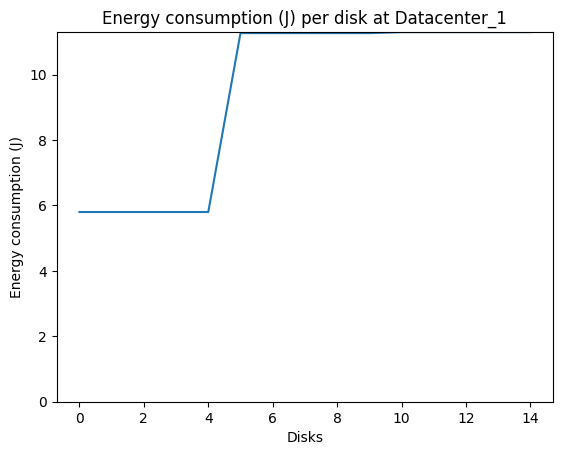

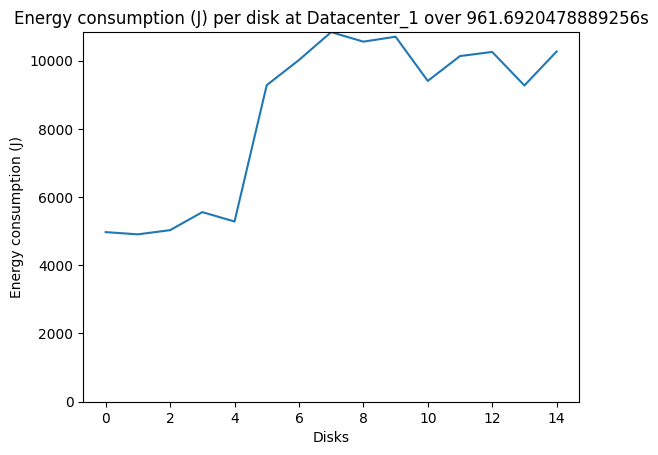

The datacenter 'Datacenter_2' current persistent storage infrastructure consumes 0.0 Kilo Joules (kJ).
 The datacenter could also have 15 disks powered off.

The datacenter 'Datacenter_2' current persistent storage infrastructure is consuming 2.885076143666777 Kilo Joules (kJ) over the duration 961.6920478889256s.
 The datacenter could also have 15 disks powered off.


/tmp/ipykernel_481758/697818400.py:60: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim((0, max(power_per_disk_per_datacenter_powered_down_disks)))


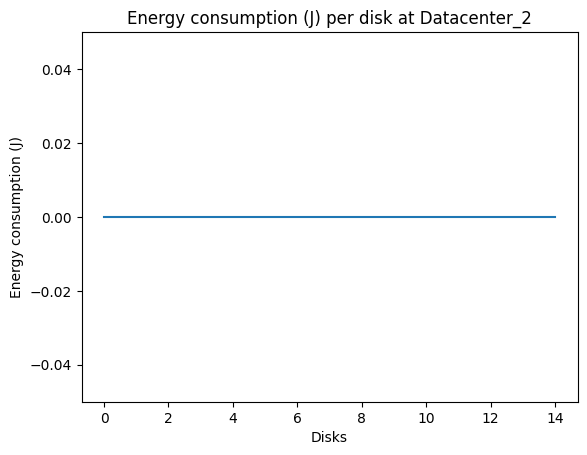

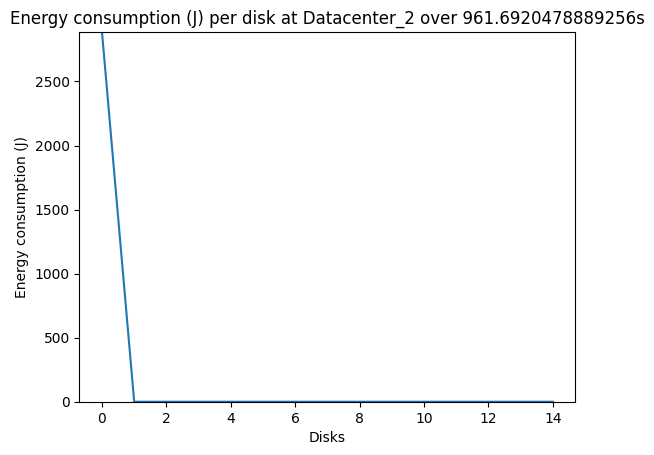

The datacenter 'Datacenter_3' current persistent storage infrastructure consumes 0.0 Kilo Joules (kJ).
 The datacenter could also have 15 disks powered off.

The datacenter 'Datacenter_3' current persistent storage infrastructure is consuming 2.885076143666777 Kilo Joules (kJ) over the duration 961.6920478889256s.
 The datacenter could also have 15 disks powered off.


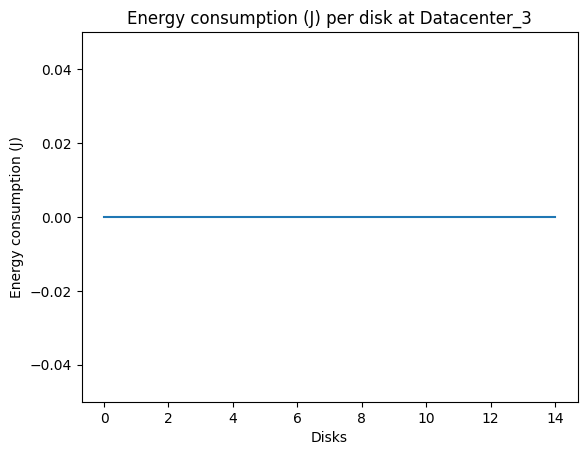

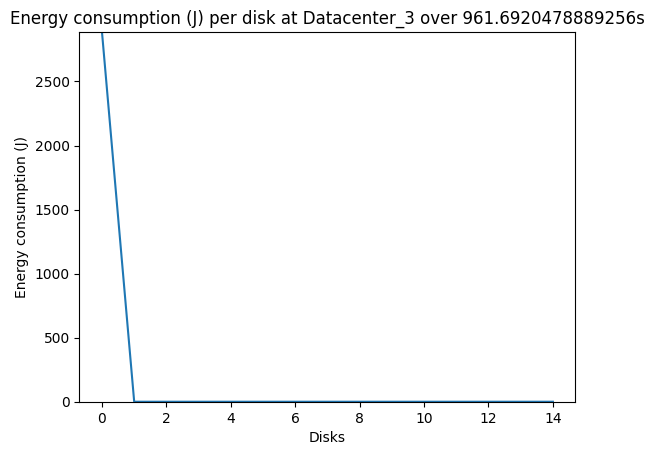

The datacenter 'Datacenter_4' current persistent storage infrastructure consumes 0.0 Kilo Joules (kJ).
 The datacenter could also have 15 disks powered off.

The datacenter 'Datacenter_4' current persistent storage infrastructure is consuming 2.885076143666777 Kilo Joules (kJ) over the duration 961.6920478889256s.
 The datacenter could also have 15 disks powered off.


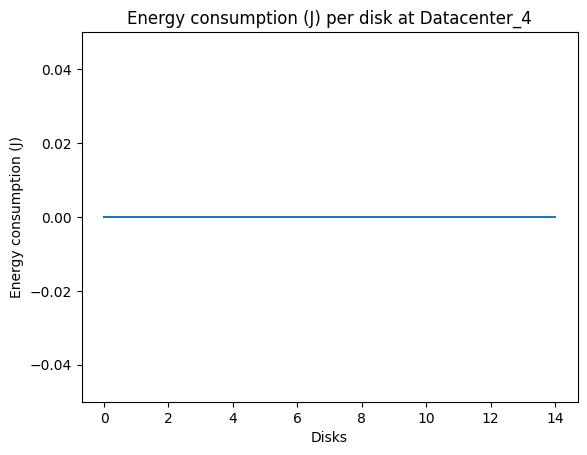

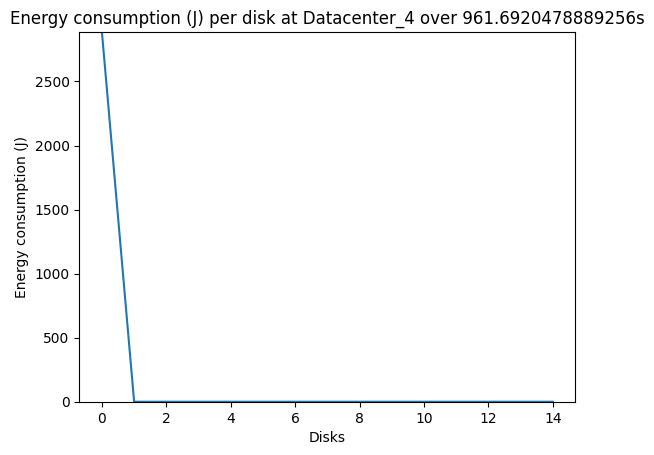

The cloud providers current storage area network consumes 0.14185 Kilo Joules (kJ).
 The cloud provider could also have 45 disks powered off.

The cloud providers current storage area network is consuming 135.11081605424374 Kilo Joules (kJ) over the duration 961.6920478889256s.
 The cloud provider could also have 45 disks powered off.


In [24]:
labels = np.unique(dataset['datacenter_name'])
power_powered_down_disks = 0
power_per_disk_powered_down_disks = np.array([])

power_consumed_powered_down_disks = 0
power_consumed_per_disk_powered_down_disks = np.array([])

power_per_datacenter_powered_down_disks = np.array([])
power_consumed_per_datacenter_powered_down_disks = np.array([])

duration = dataset['duration'][0]
disks_powered_off = 0
for i in range(len(labels)):
    # power_per_datacenter_powered_down_disks = 0
    power_per_disk_per_datacenter_powered_down_disks = np.array([])
    
    # power_consumed_per_datacenter_powered_down_disks = 0
    power_consumed_per_disk_per_datacenter_powered_down_disks = np.array([])
    
    duration_per_disk_per_datacenter = np.array([])
    disks_powered_off_at_datacenter = 0
    for _, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        
        # If capacity used is 0, the disk is powered off
        consumed_active_power = 0
        consumed_idle_power = 0
        current_disk_power = 0
        if sample['capacity_used'] != 0:
            consumed_active_power = float(sample['active_duration']) * float(sample['active_power'])
            consumed_idle_power = (float(sample['duration']) - float(sample['active_duration'])) * float(sample['idle_power'])
            
            if float(sample['active_duration']) != 0:
                current_disk_power = float(sample['active_power'])
            else:
                current_disk_power = 0
                disks_powered_off += 1
                disks_powered_off_at_datacenter += 1
        else:
            current_disk_power = 0
            disks_powered_off += 1
            disks_powered_off_at_datacenter += 1
        
        # power_per_datacenter_powered_down_disks += current_disk_power
        power_per_disk_powered_down_disks = np.append(power_per_disk_powered_down_disks, current_disk_power)
        power_per_disk_per_datacenter_powered_down_disks = np.append(power_per_disk_per_datacenter_powered_down_disks, current_disk_power)
        
        # power_consumed_per_datacenter_powered_down_disks += consumed_active_power + consumed_idle_power
        power_consumed_per_disk_powered_down_disks = np.append(power_consumed_per_disk_powered_down_disks, consumed_active_power + consumed_idle_power)
        power_consumed_per_disk_per_datacenter_powered_down_disks = np.append(power_consumed_per_disk_per_datacenter_powered_down_disks, consumed_active_power + consumed_idle_power)
        duration_per_disk = np.append(duration_per_disk, float(sample['duration']))
    power_per_datacenter_powered_down_disks = np.append(power_per_datacenter_powered_down_disks, np.sum(power_per_disk_per_datacenter_powered_down_disks))
    power_consumed_per_datacenter_powered_down_disks = np.append(power_consumed_per_datacenter_powered_down_disks, np.sum(power_consumed_per_disk_per_datacenter_powered_down_disks))
    
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure consumes {(np.sum(power_per_disk_per_datacenter_powered_down_disks) * 1)/1000} Kilo Joules (kJ).\n The datacenter could also have {disks_powered_off_at_datacenter} disks powered off.\n") # Get actual duration, get average power? or the power consumed power over the duration?
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure is consuming {(np.sum(power_consumed_per_disk_per_datacenter_powered_down_disks) * 1)/1000} Kilo Joules (kJ) over the duration {duration}s.\n The datacenter could also have {disks_powered_off_at_datacenter} disks powered off.") # Get actual duration, get average power? or the power consumed power over the duration?
    # power_powered_down_disks += power_per_datacenter_powered_down_disks
    # power_consumed_powered_down_disks += power_consumed_per_datacenter_powered_down_disks
    
    plt.plot(np.arange(0, len(power_per_disk_per_datacenter_powered_down_disks)), (power_per_disk_per_datacenter_powered_down_disks*1))
    plt.ylim((0, max(power_per_disk_per_datacenter_powered_down_disks)))
    plt.xlabel("Disks")
    plt.ylabel("Energy consumption (J)")
    plt.title(f"Energy consumption (J) per disk at {labels[i]}")
    plt.show()
    
    plt.plot(np.arange(0, len(power_consumed_per_disk_per_datacenter_powered_down_disks)), (power_consumed_per_disk_per_datacenter_powered_down_disks*1))
    plt.ylim((0, max(power_consumed_per_disk_per_datacenter_powered_down_disks)))
    plt.xlabel("Disks")
    plt.ylabel(f"Energy consumption (J)")
    plt.title(f"Energy consumption (J) per disk at {labels[i]} over {duration}s")
    plt.show()

print(f"The cloud providers current storage area network consumes {(np.sum(power_per_datacenter_powered_down_disks) * 1)/1000} Kilo Joules (kJ).\n The cloud provider could also have {disks_powered_off} disks powered off.\n") # Get actual duration, get average power? or the power consumed power over the duration?
print(f"The cloud providers current storage area network is consuming {(np.sum(power_consumed_per_datacenter_powered_down_disks) * 1)/1000} Kilo Joules (kJ) over the duration {duration}s.\n The cloud provider could also have {disks_powered_off} disks powered off.") # Get actual duration, get average power? or the power consumed power over the duration?

### Comparing and Combining Approaches

An additional aspect of reducing power consumption not investigated in this system is powering down the storage server that the HDD is connected to where may contain more than one disk per host.

Saved energy consumption:
- Powering down disks 0.24150000000000002kJ/s


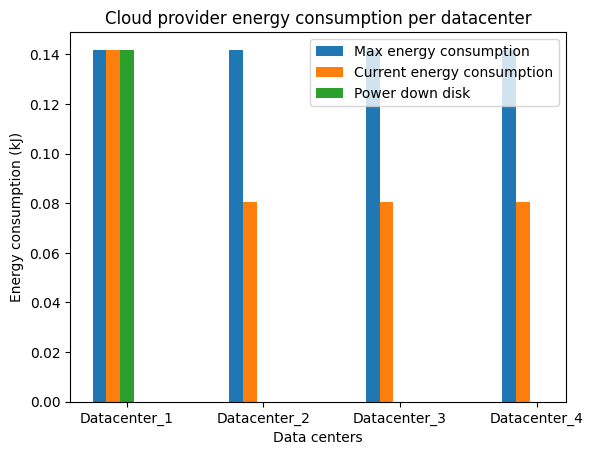

In [25]:
labels = np.unique(dataset['datacenter_name'])
print(f"Saved energy consumption:")
print(f"- Powering down disks {((np.sum(current_power_per_datacenter) * 1)/1000) - ((np.sum(power_per_datacenter_powered_down_disks) * 1)/1000)}kJ/s")
# print(f"- DVFS {np.sum(power_per_host)/1000 - np.sum(min_host_power_per_host)/1000}kJ/s")
# print(f"- powering down host and DVFS {np.sum(power_per_host)/1000 - np.sum(min_host_power_per_host)/1000}kJ/s")

x = np.arange(len(labels))
bar_width = 0.1
plt.bar(x - 0.2, (max_power_per_datacenter / 1000) * 1, width=bar_width, label="Max energy consumption")
plt.bar(x - 0.1, (current_power_per_datacenter / 1000) * 1, width=bar_width, label="Current energy consumption")
plt.bar(x, (power_per_datacenter_powered_down_disks / 1000) * 1, width=bar_width, label="Power down disk")
# plt.bar(x + 0.1, (min_host_power_per_host / 1000) * 1, width=bar_width, label="DVFS energy consumption")
# plt.bar(x + 0.2, (min_host_power_per_host / 1000) * 1, width=bar_width, label="Power down hosts and DVFS energy consumption")
plt.xticks(np.arange(len(labels)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ/s)")
plt.title(f"Cloud provider energy consumption per datacenter")
plt.legend()
plt.show()

Saved energy consumption over the duration 961.6920478889256:
- Powering down disks 215027.9958311749kJ


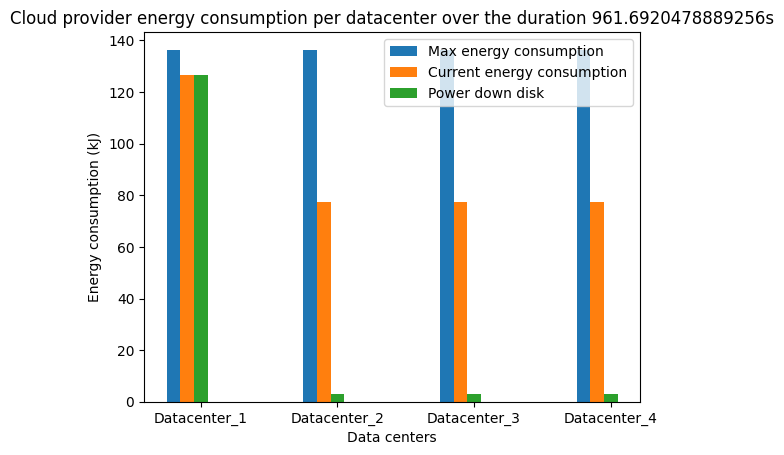

In [26]:
labels = np.unique(dataset['datacenter_name'])
duration = dataset['duration'][0]

print(f"Saved energy consumption over the duration {duration}:")
print(f"- Powering down disks {((np.sum(current_power_consumed_per_datacenter) * duration)/1000) - ((np.sum(power_consumed_per_datacenter_powered_down_disks) * duration)/1000)}kJ")
# print(f"- DVFS {np.sum(power_per_host)/1000 - np.sum(min_host_power_per_host)/1000}kJ/s")
# print(f"- powering down disks and DVFS {np.sum(power_per_host)/1000 - np.sum(min_host_power_per_host)/1000}kJ/s")

x = np.arange(len(labels))
bar_width = 0.1
plt.bar(x - 0.2, (max_power_consumed_per_datacenter / 1000) * 1, width=bar_width, label="Max energy consumption")
plt.bar(x - 0.1, (current_power_consumed_per_datacenter / 1000) * 1, width=bar_width, label="Current energy consumption")
plt.bar(x, (power_consumed_per_datacenter_powered_down_disks / 1000) * 1, width=bar_width, label="Power down disk")
# plt.bar(x + 0.1, (min_host_power_per_host / 1000) * 1, width=bar_width, label="DVFS energy consumption")
# plt.bar(x + 0.2, (min_host_power_per_host / 1000) * 1, width=bar_width, label="Power down disks and DVFS energy consumption")
plt.xticks(np.arange(len(labels)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption per datacenter over the duration {duration}s")
plt.legend()
plt.show()